## Gaussian Transformation / Normal Distribution  
Some of the machine learning models like linear and logistic regression assume that the features are normally distributed. and we find that very often features are not normally distributed, and that is the whole reason why we need to transform them. so the next question arise , what are the possible transformations?  
  
## We can transform our variables as following  
The most commonly used methods to transform variables are:  
  
Logarithmic transformation : np.log(x)  
Reciprocal/inverse transformation : 1 / x  
Square root transformation - x**(1/2)  
Box-Cox transformation  
Yeo-Johnson transformation  
Exponential transformation (you can use any exponent/ root such as 1/3)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats ## will use for box cox and yeo johnson transformation
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("C:\\Users\\koriv\\Desktop\\MachineLearning_DataScience\\Hands_On_Machine_Learning\\Feature_Transformation\\train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:>

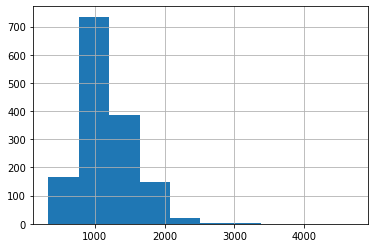

In [6]:
data["1stFlrSF"].hist(figsize=(6,6))

In [9]:
# Function to take in DataFrame and Variable to plot histogram and Q-Q plot
def plotvariale(df, variable):
    plt.figure(figsize=(14,8))
    plt.subplot(1,2,1) ## means 1 row , 2 columns and 1st plot
    df[variable].hist(bins=50)
    
    ## QQ plot
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

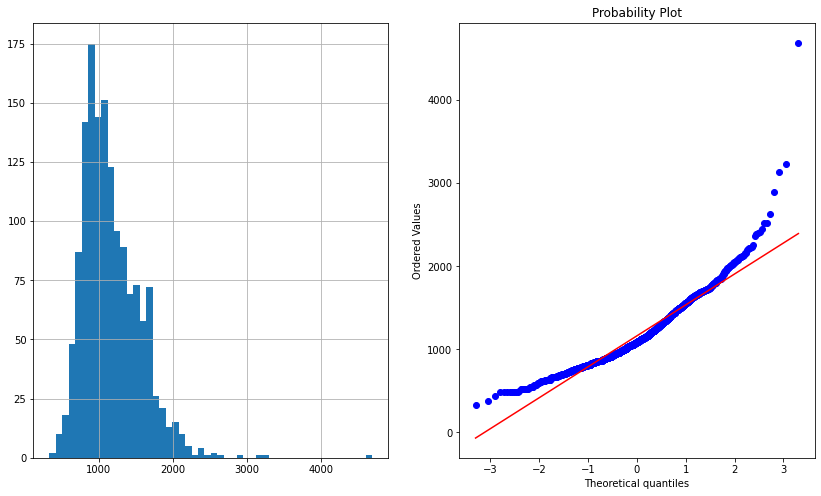

In [12]:
#Check the plots for unTransformed column, Right skew indicates log transformation fits fine
plotvariale(data, '1stFlrSF')
#hence we have conformed that our data is not normally distributed and we need to make some transformations before supplying to the model

# Log transformation

should only be applied to the variable if the values are >0

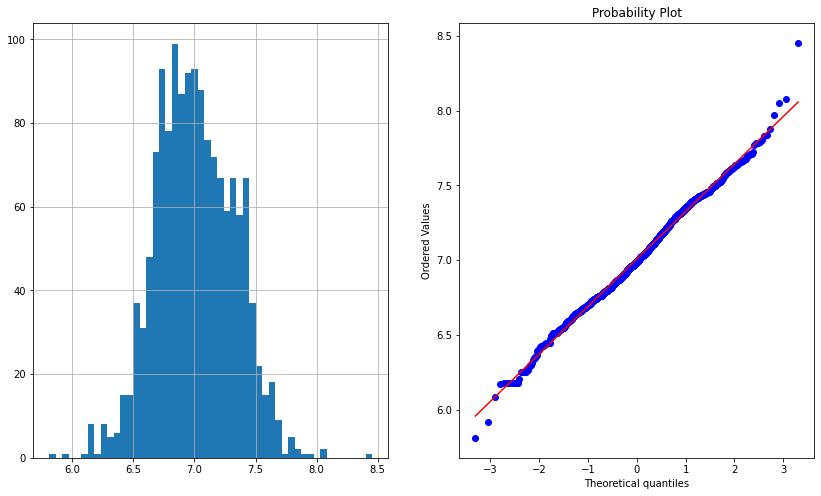

In [15]:
data["1stFlrSF_log"] = np.log(data["1stFlrSF"])
plotvariale(data,'1stFlrSF_log')

# Inverse / reciprocal transformation
should not be applied if the feature contains 0 because 1/0 = infonity

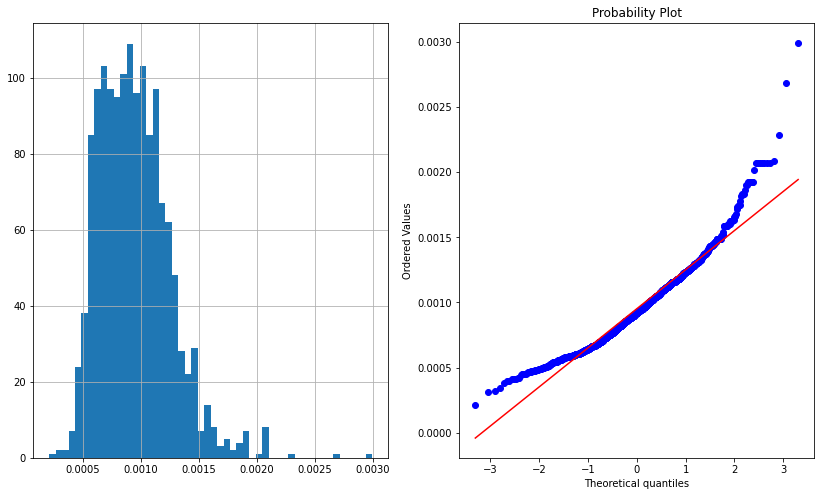

In [16]:
data["1stFlrSF_Inv"] = 1/ data["1stFlrSF"]
plotvariale(data,"1stFlrSF_Inv")

# Square root transformation

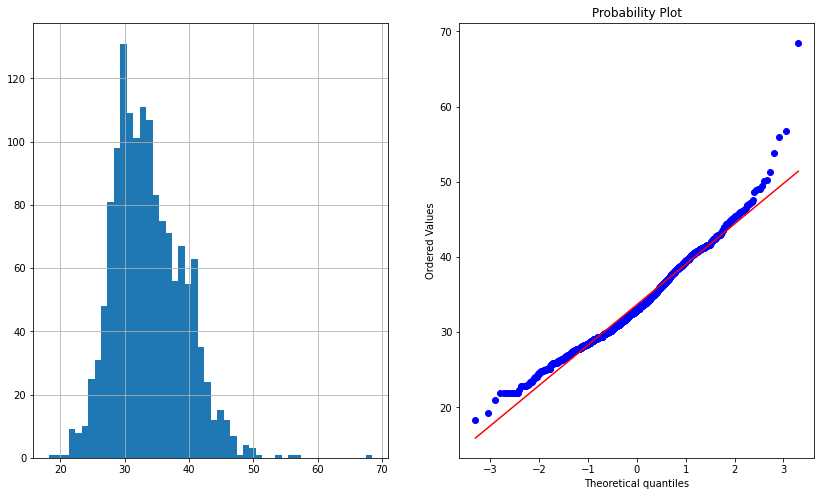

In [17]:
data["1stFlrSF_sqroot"] = data["1stFlrSF"] ** (1/2)
plotvariale(data,"1stFlrSF_sqroot")

# Exponential transformation

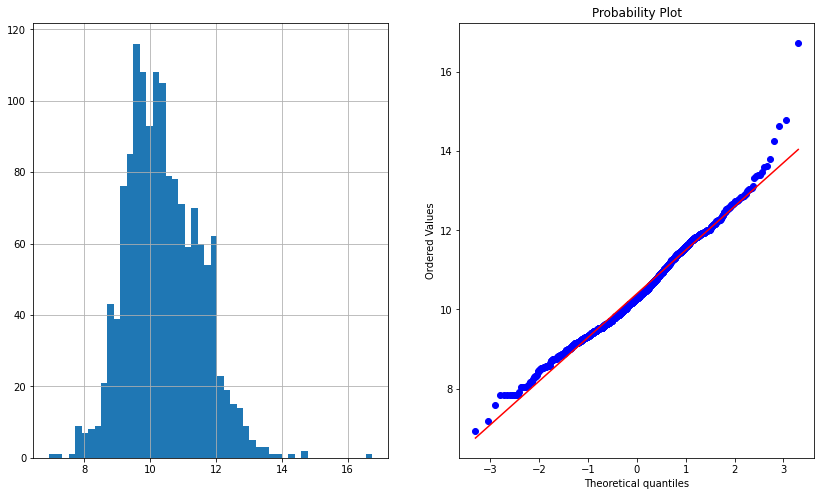

In [18]:
data["1stFlrSF_cbroot"] = data["1stFlrSF"] ** (1/3)
plotvariale(data,"1stFlrSF_cbroot")

# Box cox transformation
The Box-Cox transformation is defined as below:  
F(x)=(x exp(λ)−1)/λ if λ!=0, or log(x) otherwise. Let's have a look.  

In [19]:
data["1stFlrSF_boxcox"], lambdavalue = stats.boxcox(data['1stFlrSF'])
print("selected value for lambda is " , lambdavalue)

selected value for lambda is  -0.07883214484264238


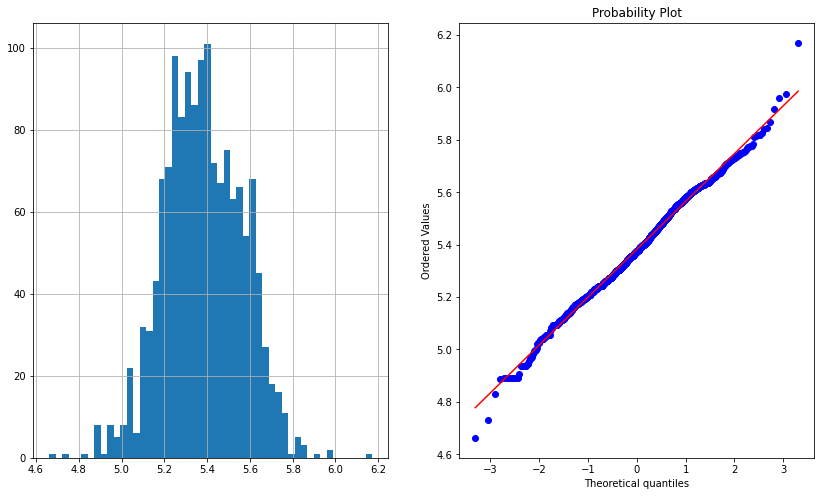

In [20]:
plotvariale(data, "1stFlrSF_boxcox")

# yeo johnson

In [21]:
data["1stFlrSF_yj"], lambdavalue = stats.yeojohnson(data['1stFlrSF'])
print("selected value for lambda is " , lambdavalue)

selected value for lambda is  -0.07987709830415687


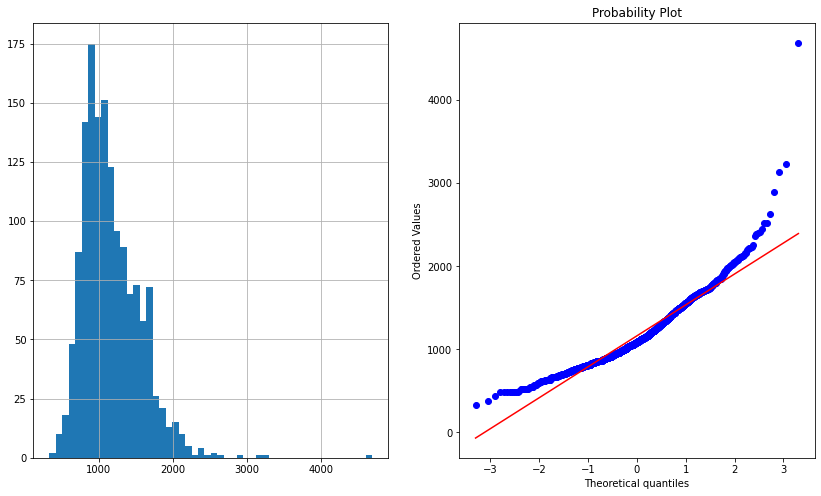

In [22]:
plotvariale(data,"1stFlrSF" )